# Heat Exchanger - Cold inlet temperature prediction

#### Insights into Database:
- Assumption: The database is collected from a single heat exchanger
- From given readings, we can calculate the mean efficiency of HX
- Keeping the efficiency constant, if other information such as properties of fluid / vapour are provided, 
  we would be able to mathematically calculate the linear function from equations of HX
- This function can then be used for obtaing ideal R2 vs actual R2 error for obtaining better fit for our dataset.
- The above points are not included in code below due to data limitations &/or lack of knowledge in HX

1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2. Read and infer from dataset

In [2]:
df = pd.read_csv('heat_exchanger_data.csv')
df.head()

,Date-Time,HX_Example_Data_V11_v1?Hot_Liquid_Flow_Data,HX_Example_Data_V11_v1?Cold_Liquid_Flow_Data,HX_Example_Data_V11_v1?T_Hot_in_Data,HX_Example_Data_V11_v1?T_Cold_Out_Data,HX_Example_Data_V11_v1?T_Hot_out_Data,HX_Example_Data_V11_v1?T_Cold_In_Data
0,2015-09-02T00:00:00,167681.5000,429538.7746,450.949167,294.067500,300.791042,181.810833
1,2015-09-03T00:00:00,200173.9288,536648.1083,474.211458,322.626042,260.170417,193.486667
2,2015-09-04T00:00:00,198832.0258,536619.7690,477.016042,328.282292,267.467500,197.263750
3,2015-09-05T00:00:00,198812.4746,536678.3690,477.460833,328.842083,268.148333,196.217917
4,2015-09-06T00:00:00,198785.0894,536695.3965,475.920208,323.869375,261.427083,189.074792


3. Check for null values & data type for any modification required (null value removal / categorical to numerical conversion)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date-Time                                     791 non-null    object 
 1   HX_Example_Data_V11_v1?Hot_Liquid_Flow_Data   791 non-null    float64
 2   HX_Example_Data_V11_v1?Cold_Liquid_Flow_Data  791 non-null    float64
 3   HX_Example_Data_V11_v1?T_Hot_in_Data          791 non-null    float64
 4   HX_Example_Data_V11_v1?T_Cold_Out_Data        791 non-null    float64
 5   HX_Example_Data_V11_v1?T_Hot_out_Data         791 non-null    float64
 6   HX_Example_Data_V11_v1?T_Cold_In_Data         791 non-null    float64
dtypes: float64(6), object(1)
memory usage: 43.4+ KB


4. Check data count, range & deviation

In [4]:
df.describe()

,HX_Example_Data_V11_v1?Hot_Liquid_Flow_Data,HX_Example_Data_V11_v1?Cold_Liquid_Flow_Data,HX_Example_Data_V11_v1?T_Hot_in_Data,HX_Example_Data_V11_v1?T_Cold_Out_Data,HX_Example_Data_V11_v1?T_Hot_out_Data,HX_Example_Data_V11_v1?T_Cold_In_Data
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,193950.516666,676201.683288,487.327235,293.121550,277.183134,186.788988
std,24194.029369,109929.968627,51.144612,28.936504,31.012447,17.090105
min,37641.362290,18207.248750,64.554167,65.291458,75.162708,69.010208
25%,181998.296450,664151.202100,484.806979,280.595417,264.139688,178.255104
50%,196010.898100,722337.922500,498.684792,295.552083,285.594583,189.267708
75%,210001.117400,735175.060850,503.724479,310.052292,297.818437,198.510833
max,252007.095600,737916.072700,525.801042,343.458125,332.108333,220.185417


5. Renaming Columns for better understanding in sns

In [5]:

df.rename(columns ={df.columns[1]:'Hot_Liquid_Flow', df.columns[2]:'Cold_Liquid_Flow', 
                    df.columns[3]:'T_Hot_in', df.columns[4]:'T_Cold_Out',
                    df.columns[5]:'T_Hot_out', df.columns[6]:'T_Cold_In'}, inplace = True)

df.head()

,Date-Time,Hot_Liquid_Flow,Cold_Liquid_Flow,T_Hot_in,T_Cold_Out,T_Hot_out,T_Cold_In
0,2015-09-02T00:00:00,167681.5000,429538.7746,450.949167,294.067500,300.791042,181.810833
1,2015-09-03T00:00:00,200173.9288,536648.1083,474.211458,322.626042,260.170417,193.486667
2,2015-09-04T00:00:00,198832.0258,536619.7690,477.016042,328.282292,267.467500,197.263750
3,2015-09-05T00:00:00,198812.4746,536678.3690,477.460833,328.842083,268.148333,196.217917
4,2015-09-06T00:00:00,198785.0894,536695.3965,475.920208,323.869375,261.427083,189.074792


6. Remove outliers & unwanted columns

In [6]:
desc = df.describe()
df_out = df.copy()
for i in range(1,len(df.columns)):
    Q1:float = desc.iloc[4][i-1]
    Q3:float = desc.iloc[6][i-1]
    IQR = Q3-Q1
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    df_out = df_out[df_out[df_out.columns[i]] > min_IQR]
    df_out = df_out[df_out[df_out.columns[i]] < max_IQR]

df_out = df_out.drop(['Date-Time'], axis=1) # Removing unwanted columns
print('rows count reduced to: ',len(df_out), ' from: ', len(df))
df_out.head()

rows count reduced to:  708  from:  791


,Hot_Liquid_Flow,Cold_Liquid_Flow,T_Hot_in,T_Cold_Out,T_Hot_out,T_Cold_In
14,195982.2752,570941.9398,481.925000,324.705208,265.028542,195.252708
15,201899.2321,671186.1135,482.626042,309.845417,253.126250,189.727917
16,216022.4194,736233.8046,490.076042,306.939167,249.102708,185.633750
17,224005.8750,737916.0727,497.844792,312.500833,252.191042,184.772083
18,224010.8352,737297.5163,500.690417,314.427917,253.809167,186.347917


7. Plot pair plot to observe relationships between features & nature of distribution from histograms

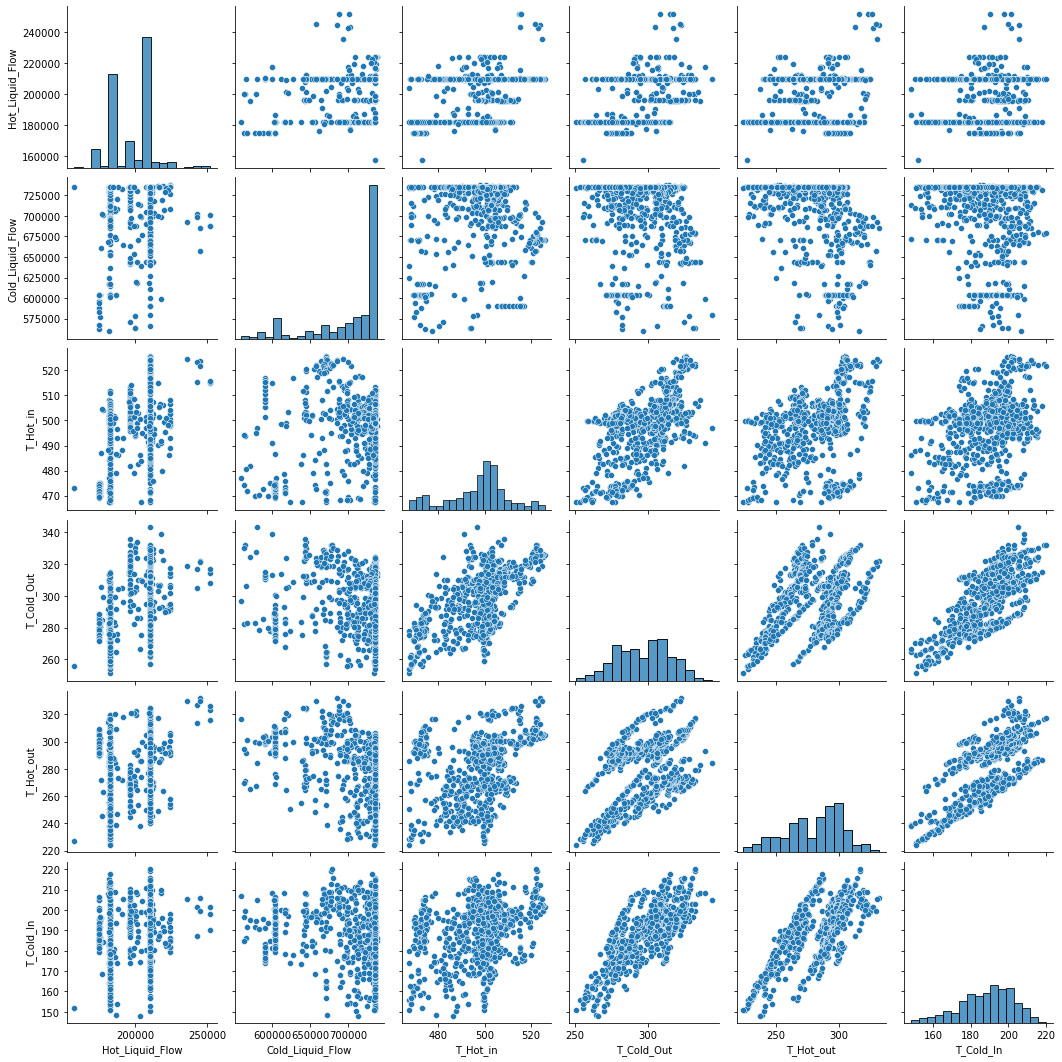

In [7]:
sns.pairplot(df_out)

From above plot (histograms) & description, it can be observed that not all distributions are gaussian & range varies by a magnitude of 10**3. Thus, we need to standardize our data for regression to work.

8. Standardizing data

In [8]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_norm = scaler.fit_transform(df_out)

print(data_norm.mean(axis=0))
print(data_norm.std(axis=0))
print('min:', data_norm.min(axis=0), '\n','max:', data_norm.max(axis=0))

[ 4.81723889e-16  3.61292916e-16  2.26309869e-15 -7.62729490e-16
 -1.28459704e-15  1.22438155e-15]
[1. 1. 1. 1. 1. 1.]
min: [-2.6835013  -3.10371655 -2.29400287 -2.55305777 -2.52615669 -2.86296324] 
 max: [3.55476948 0.76287498 2.22178774 2.59788518 2.2873381  2.23386892]


9. Plotting Correlation Matrix & VIF for multi-colinearity check

,features,vif_Factor
0,0,4.364148
1,1,4.149783
2,2,5.484208
3,3,19.756888
4,4,9.930481
5,5,17.201507


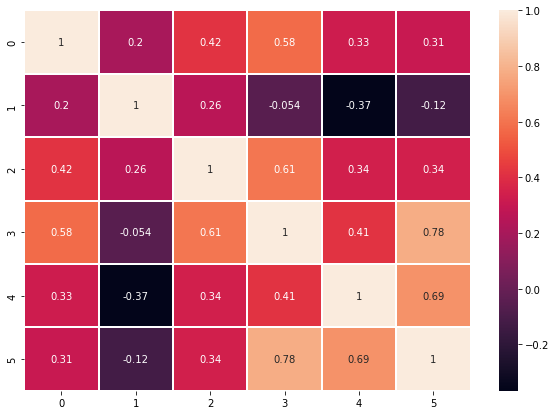

In [9]:
df_norm = pd.DataFrame(data_norm)
plt.figure(figsize=(10,7))
sns.heatmap(df_norm.corr(),annot=True,linewidths=2)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_norm.columns
vif["vif_Factor"] = [variance_inflation_factor(df_norm.values, i) for i in range(df_norm.shape[1])]
vif 

# Looking at the VIF, we see that T_Cold_Out & T_Cold_In show a high degree of multicolinearity. 
# However, we need to use T_Cold_In as the estimated value, so we cannot eliminate it. 
# Regarding T_Cold_Out, we can test our data with & without including this variable.

# ML - Model training

1. Separating input/s & output/s

In [10]:
l_column:list = list(df_norm.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list

X = df_norm[l_column[0:len_feature-1]]
y = df_norm[l_column[len_feature-1]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (708, 5)
Variable set size: (708,)


2. Splitting train - test data

In [11]:
# Splitting train - test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set del_selesize:",y_test.shape)


Training feature set size: (566, 5)
Test feature set size: (142, 5)
Training variable set size: (566,)
Test variable set del_selesize: (142,)


3. Training Linear Regression Model - all assumptions fit for using Linear Regression

The intercept term of the linear model: -0.003344654381526327
The coefficients of the linear model: [-0.39922766  0.38886841 -0.45222345  1.01198019  0.69067167]


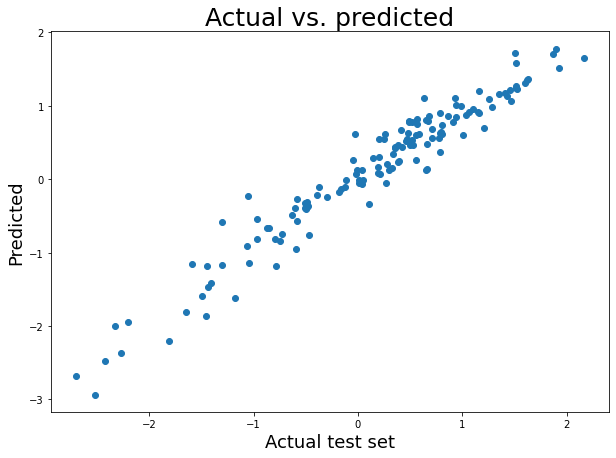

In [12]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)

train_pred=lm.predict(X_train)
test_pred = lm.predict(X_test)
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted",fontsize=25)
plt.xlabel("Actual test set",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=test_pred)


# Model Evaluation

1. Calculation of Coefficients,	Standard Error & t-statistic

In [13]:

n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k

cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

# t-statistic > 2 & < -2, hence valid
# Standard errors are minimal 

,Coefficients,Standard Error,t-statistic
0,-0.399228,0.010214,-39.086894
1,0.388868,0.010156,38.290245
2,-0.452223,0.010207,-44.306587
3,1.011980,0.010242,98.803075
4,0.690672,0.010033,68.838522


2. Evaluating model using scores mentioned below:

In [14]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,test_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,test_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
# print("Mean square Log error (RMSE):", metrics.mean_squared_log_error(y_test,test_pred))
r2_fit:float = metrics.r2_score(y_train,train_pred)
r2_pred:float = metrics.r2_score(y_test,test_pred)
print("R-squared value of this fit:",round(r2_fit,3))
print("R-squared value of Predictions:",round(r2_pred,3))
print("Adjusted R-squared value of this fit:",round((1 - ( 1-r2_pred ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )),3))

Mean absolute error (MAE): 0.1971965927036615
Mean square error (MSE): 0.06234679089529898
Root mean square error (RMSE): 0.24969339377584457
R-squared value of this fit: 0.942
R-squared value of Predictions: 0.94
Adjusted R-squared value of this fit: 0.939


# Final thoughts:

1. R2 error is 94 % for train as well as test data
2. All the errors are < 0.3 which tells that it is a good enough fit
3. Given the accuracies & evaluation scores, linear regression was a good enough choice for a balance between computation & eval matrices.
4. We can test for other regressions like SVM, Neural Networks & Random Forests